In [138]:
from dotenv import load_dotenv
load_dotenv()

# from langchain_groq import ChatGroq
# llm = ChatGroq(model_name= "llama-3.1-70b-versatile")

from langchain_ollama import OllamaLLM, ChatOllama
llm = OllamaLLM(base_url="http://localhost:11434", model="llama3.2:latest")

from langgraph.graph import StateGraph, MessagesState, START, END

In [139]:
def call_model(state: MessagesState):
    filtered_messages = state["messages"][-4:]    ## filtering code
    response = llm.invoke(filtered_messages)
    return {"messages": response}


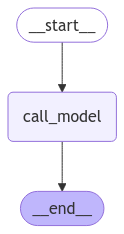

In [140]:
def graph_builder():
    workflow = StateGraph(MessagesState)
    workflow.add_node(call_model)
    workflow.add_edge(START, "call_model")
    workflow.add_edge("call_model", END)
    app = workflow.compile()
    return app

app = graph_builder()
app

In [149]:
## Memory
import time
inputs = []
input = {"role": "user", "content": "what is the capital of south korea?"}
inputs.append(input)
temp = []

In [ ]:
async for event in app.astream_events({"messages": inputs}, version="v1"):
    if event['event'] == 'on_chat_model_stream' or event['event'] == 'on_llm_stream':
        try:
            response = event['data']['chunk'].content    # groq
            temp.append(response)
            print(response, end="")  
            time.sleep(0.1)
        except:
            response = event['data']['chunk']   # ollama
            temp.append(response)
            print(response, end="")    
            time.sleep(0.1)
        finally: pass
    else: pass

Seoul is the capital of South Korea.

In [151]:
total_res = "".join(temp[:])
inputs.append({"role": "ai", "content": total_res})
print(inputs)
print(len(inputs))


[{'role': 'user', 'content': 'what is the capital of south korea?'}, {'role': 'ai', 'content': 'Seoul is the capital of South Korea.'}]
2


In [152]:
input = {"role": "user", "content": "what is the capital of japan?"}
inputs.append(input)
temp = []

async for event in app.astream_events({"messages": inputs}, version="v1"):
    if event['event'] == 'on_chat_model_stream' or event['event'] == 'on_llm_stream':
        try:
            response = event['data']['chunk'].content   # groq
            temp.append(response)
            print(response, end="")   
            time.sleep(0.1)
        except:
            response = event['data']['chunk']   # ollama
            temp.append(response)
            print(response, end="")    
            time.sleep(0.1)
        finally: pass
    else: pass

total_res = "".join(temp[:])
inputs.append({"role": "ai", "content": total_res})
print("")
print(inputs)
print(len(inputs))

Tokyo is the capital of Japan.
[{'role': 'user', 'content': 'what is the capital of south korea?'}, {'role': 'ai', 'content': 'Seoul is the capital of South Korea.'}, {'role': 'user', 'content': 'what is the capital of japan?'}, {'role': 'ai', 'content': 'Tokyo is the capital of Japan.'}]
4


In [153]:
input = {"role": "user", "content": "what is the distance of the two cities?"}
inputs.append(input)
temp = []

async for event in app.astream_events({"messages": inputs}, version="v1"):
    if event['event'] == 'on_chat_model_stream' or event['event'] == 'on_llm_stream':
        try:
            response = event['data']['chunk'].content   # groq
            temp.append(response)
            print(response, end="")   
            time.sleep(0.1)
        except:
            response = event['data']['chunk']   # ollama
            temp.append(response)
            print(response, end="")    
            time.sleep(0.1)
        finally: pass 
    else: pass

total_res = "".join(temp[:])
inputs.append({"role": "ai", "content": total_res})
print("")
print(inputs)
print(len(inputs))

The distance between Seoul, South Korea and Tokyo, Japan depends on the specific route taken. However, here are some approximate distances:

* By air: The flight distance from Seoul Incheon International Airport (ICN) to Tokyo Narita International Airport (NRT) or Tokyo Haneda Airport (HND) is approximately 1,300-1,400 km (800-870 miles).
* By land and sea: If you were to drive from Seoul to Tokyo via the Korean Peninsula and Japan, the distance would be significantly longer, around 3,500-4,000 km (2,175-2,485 miles), depending on the route taken.
* By straight line: The straight-line distance between the two cities is approximately 1,200-1,300 km (750-810 miles).
[{'role': 'user', 'content': 'what is the capital of south korea?'}, {'role': 'ai', 'content': 'Seoul is the capital of South Korea.'}, {'role': 'user', 'content': 'what is the capital of japan?'}, {'role': 'ai', 'content': 'Tokyo is the capital of Japan.'}, {'role': 'user', 'content': 'what is the distance of the two cities?

In [154]:
input = {"role": "user", "content": "let me know the all capitals that is previously discussed"}
inputs.append(input)
temp = []

async for event in app.astream_events({"messages": inputs}, version="v1"):
    if event['event'] == 'on_chat_model_stream' or event['event'] == 'on_llm_stream':
        try:
            response = event['data']['chunk'].content   # groq
            temp.append(response)
            print(response, end="")   
            time.sleep(0.1)
        except: 
            response = event['data']['chunk']  # ollama
            temp.append(response)
            print(response, end="")    
            time.sleep(0.1)
        finally: pass
    else: pass

total_res = "".join(temp[:])
inputs.append({"role": "ai", "content": total_res})
print("")
print(inputs)
print(len(inputs))

The capital mentioned earlier was "JAPAN".
[{'role': 'user', 'content': 'what is the capital of south korea?'}, {'role': 'ai', 'content': 'Seoul is the capital of South Korea.'}, {'role': 'user', 'content': 'what is the capital of japan?'}, {'role': 'ai', 'content': 'Tokyo is the capital of Japan.'}, {'role': 'user', 'content': 'what is the distance of the two cities?'}, {'role': 'ai', 'content': 'The distance between Seoul, South Korea and Tokyo, Japan depends on the specific route taken. However, here are some approximate distances:\n\n* By air: The flight distance from Seoul Incheon International Airport (ICN) to Tokyo Narita International Airport (NRT) or Tokyo Haneda Airport (HND) is approximately 1,300-1,400 km (800-870 miles).\n* By land and sea: If you were to drive from Seoul to Tokyo via the Korean Peninsula and Japan, the distance would be significantly longer, around 3,500-4,000 km (2,175-2,485 miles), depending on the route taken.\n* By straight line: The straight-line dis